# 4.1.5 Regresión polinómica

In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [18]:
#
# Función a aproximar
# (Proceso geneador de datos)
#
def f(x):
    return 2 * np.abs(np.sin(x * np.pi / 4 + 0.75)) / (1 + 0.1 * x)


#
# Datos reales.
# (No disponibles en la realidad)
#
x_real = np.linspace(0, 10, 100)
X_real = x_real[:, np.newaxis]
y_real = f(x_real)

In [19]:
#
# Muestra de datos.
# (Información disponible en la realidad)
#
rng = np.random.default_rng(12345)

x_sample = x_real.copy()
rng.shuffle(x_sample)
x_sample = x_sample[:25]
x_sample = np.sort(x_sample)

y_sample = f(x_sample)
X_sample = x_sample[:, np.newaxis]

## 4.1.5.1 Conjuntos de entrenamiento y test

In [20]:
X_train, X_test, y_train_true, y_test_true = train_test_split(
    X_sample,
    y_sample,
    test_size=5,
    random_state=12345,
    shuffle=True,
)

## 4.1.5.2 Especificación del modelo

In [21]:
#
# Define el modelo usando una tuberia
#
pipeline = make_pipeline(
    PolynomialFeatures(include_bias=False),
    MinMaxScaler(),
    LinearRegression(),
)

print(pipeline)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])


In [22]:
#
# Esquema de validación cruzada
#
leaveOneOut = LeaveOneOut()

leaveOneOut

LeaveOneOut()

In [23]:
param_grid = [
    {
        "polynomialfeatures__degree": list(range(1, 24)),
    },
]

gridSearchCV = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=leaveOneOut,
    scoring="neg_mean_squared_error",
    refit=True,
)

print(gridSearchCV)

GridSearchCV(cv=LeaveOneOut(),
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid=[{'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23]}],
             scoring='neg_mean_squared_error')


## 4.1.5.3 Búsqueda de hiperparámetros

In [24]:
gridSearchCV.fit(X_train, y_train_true)

GridSearchCV(cv=LeaveOneOut(),
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid=[{'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23]}],
             scoring='neg_mean_squared_error')

In [25]:
gridSearchCV.best_params_

{'polynomialfeatures__degree': 10}

## 4.1.5.4 Pronóstico

In [26]:
y_pred = gridSearchCV.predict(X_real)

## 4.1.5.5 Visualización de resultados

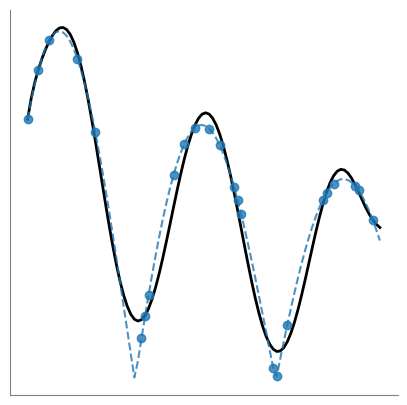

In [27]:
plt.figure(figsize=(5, 5))

plt.plot(x_real, y_real, "--", color="tab:blue", alpha=0.8, zorder=10)
plt.plot(x_sample, y_sample, "o", color="tab:blue", alpha=0.8, zorder=10)

plt.plot(
    x_real,
    y_pred,
    color="black",
    linewidth=2,
)

plt.xticks([], [])
plt.yticks([], [])

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

In [28]:
print('ok_')

ok_
